Copyright: Data Science for Marketing Analytics: A practical guide to forming a killer marketing strategy through data analysis with Python (second edition)

Written by Mirza Rahim Baig, Gururajan Govindan, and Vishwesh Ravi Shrimali

Chapter 3: Unsupervised Learning and Customer Segmentation

Chapter 4: Evaluating and Choosing the Best Segmentation Approach

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
data0 = pd.read_csv("Mall_Customers.csv")
data0.head()
#spending score - depends on the amount of shopping the customer has done at the mall – a higher score means a higher spend

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data0.rename({'Annual Income (k$)':'Income', \
              'Spending Score (1-100)':'Spend_score'}, axis=1, \
             inplace=True)
data0.head()

,CustomerID,Gender,Age,Income,Spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data0.describe()

,CustomerID,Age,Income,Spend_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Exercise 3.02: Traditional Segmentation of Mall Customers

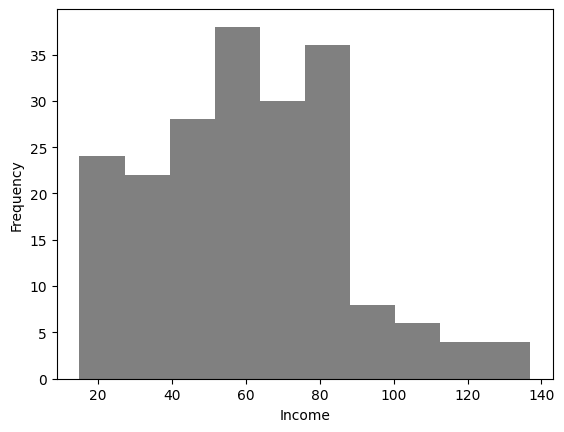

In [5]:
data0.Income.plot.hist(color='gray')
plt.xlabel('Income')
plt.show()

In [6]:
#Create a new column ‘Cluster’ to have the values ‘Low Income’, ‘Moderate Income’, ‘High earners’ for customers
#with income in the ranges < 50, 50 – 90, and >= 90 respectively, using the code below.
data0['Cluster'] = np.where(data0.Income >= 90, 'High earners', \
                            np.where(data0.Income < 50, \
                            'Low Income', 'Moderate Income'))
print(data0.head())

   CustomerID  Gender  Age  Income  Spend_score     Cluster
0           1    Male   19      15           39  Low Income
1           2    Male   21      15           81  Low Income
2           3  Female   20      16            6  Low Income
3           4  Female   23      16           77  Low Income
4           5  Female   31      17           40  Low Income


In [7]:
data0.groupby('Cluster')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
High earners,22.0,108.181818,13.661334,93.0,98.25,103.0,118.25,137.0
Low Income,72.0,33.027778,11.091136,15.0,22.50,33.5,43.00,49.0
Moderate Income,106.0,69.377358,10.651584,50.0,61.00,70.0,78.00,88.0


Exercise 3.03: Standardizing Customer Data

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols_to_scale = ['Age', 'Income', 'Spend_score']

data_scaled = data0.copy()

# Standardization Equation: (x-mean)/std, using fit_transform
data_scaled[cols_to_scale] = scaler.fit_transform\
                             (data0[cols_to_scale])

In [9]:
data_scaled[cols_to_scale].describe()
data_scaled.head()

,CustomerID,Gender,Age,Income,Spend_score,Cluster
0,1,Male,-1.424569,-1.738999,-0.434801,Low Income
1,2,Male,-1.281035,-1.738999,1.195704,Low Income
2,3,Female,-1.352802,-1.700830,-1.715913,Low Income
3,4,Female,-1.137502,-1.700830,1.040418,Low Income
4,5,Female,-0.563369,-1.662660,-0.395980,Low Income


Exercise 3.04: Calculating distance between customers

In [10]:
sel_cols = ['Income', 'Spend_score']
cust3 = data_scaled[sel_cols].head(3)
cust3

,Income,Spend_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913


In [11]:
from scipy.spatial.distance import cdist

In [12]:
#d(p,q)=sqrt(sum of (pi-qi)^2)
cdist(cust3, cust3, metric='euclidean')

array([[0.        , 1.63050555, 1.28167999],
       [1.63050555, 0.        , 2.91186723],
       [1.28167999, 2.91186723, 0.        ]])

In [13]:
#verification
np.sqrt((-1.739+1.739)**2 + (-0.4348-1.1957)**2)

1.6305

Exercise 3.05: k-means Clustering on Mall Customers

In [14]:
cluster_cols = ['Income', 'Spend_score']
data_scaled[cluster_cols].head(3)

,Income,Spend_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913


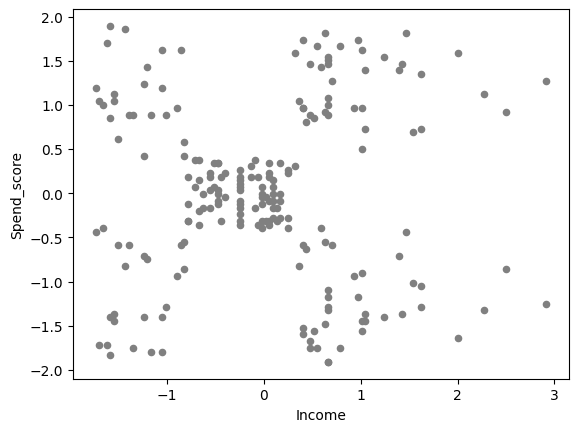

In [15]:
data_scaled.plot.scatter(x='Income', y='Spend_score', \
                         color='gray')
plt.show()
#From the plot, there are 5 natural clusters in the data.

In [16]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=42)

In [17]:
model.fit(data_scaled[cluster_cols])

data_scaled['Cluster'] = model.predict(data_scaled[cluster_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
data_scaled.head(3)

,CustomerID,Gender,Age,Income,Spend_score,Cluster
0,1,Male,-1.424569,-1.738999,-0.434801,2
1,2,Male,-1.281035,-1.738999,1.195704,3
2,3,Female,-1.352802,-1.700830,-1.715913,2


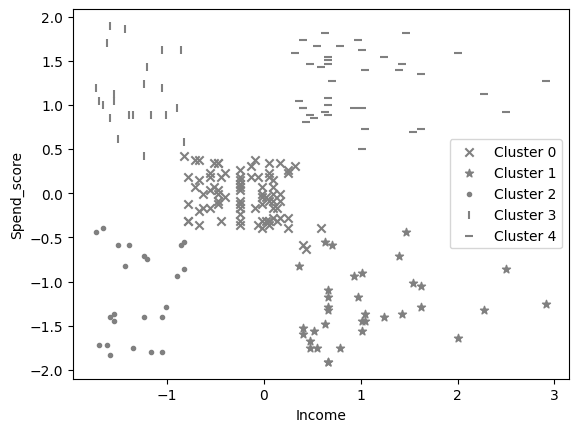

In [19]:
markers = ['x', '*', '.','|','_']

for clust in range(5):
    temp = data_scaled[data_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, \
                marker=markers[clust], \
                color = 'gray',\
                label="Cluster "+str(clust))
plt.xlabel('Income')
plt.ylabel('Spend_score')
plt.legend()
plt.show()

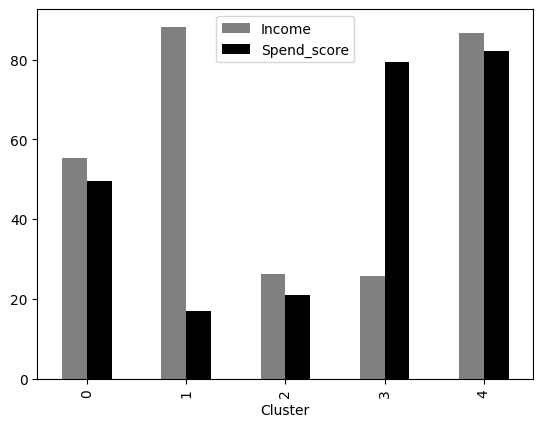

In [20]:
data0['Cluster'] = data_scaled.Cluster
data0.groupby('Cluster')[['Income', 'Spend_score']].mean()\
.plot.bar(color=['gray','black'])
plt.show()

Describe clusters:
Cluster 0: Moderate income modarate spenders
Cluster 1: High income low spenders
Cluster 2: low income low spenders
Cluster 3: low income high spenders
Cluster 4: high income high spenders

Exercise 3.06: Dealing with High-Dimensional Data

In [21]:
cluster_cols = ['Age', 'Income', 'Spend_score']
data_scaled[cluster_cols].head(3)

,Age,Income,Spend_score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913


In [22]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(data_scaled[cluster_cols])
#Perform k-means clustering, specifying 4 clusters using the scaled features

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [23]:
data_scaled['Cluster'] = model.predict(data_scaled[cluster_cols])

In [24]:
from sklearn import decomposition

#To calculate two PCs
pca = decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(data_scaled[cluster_cols])

data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]
#Using PCA on the scaled columns, create two new columns, pc1 and pc2, containing the data for PC1 and PC2 respectively

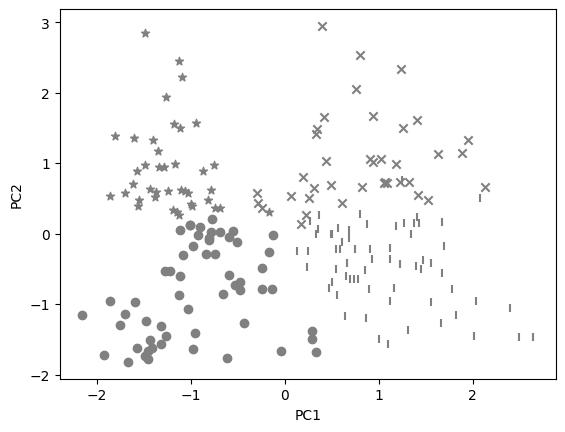

In [25]:
markers = ['x', '*', 'o','|']

for clust in range(4):
    temp = data_scaled[data_scaled.Cluster == clust]
    plt.scatter(temp.pc1, temp.pc2, marker=markers[clust], \
                label="Cluster "+str(clust), \
                color='gray')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [26]:
data0['Cluster'] = data_scaled.Cluster

In [27]:
data0.groupby('Cluster')[['Age', 'Income', 'Spend_score']].mean()
#print the average values of the original features used for clustering against the four clusters

,Age,Income,Spend_score
Cluster,,,
0,39.368421,86.500000,19.578947
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,53.984615,47.707692,39.969231


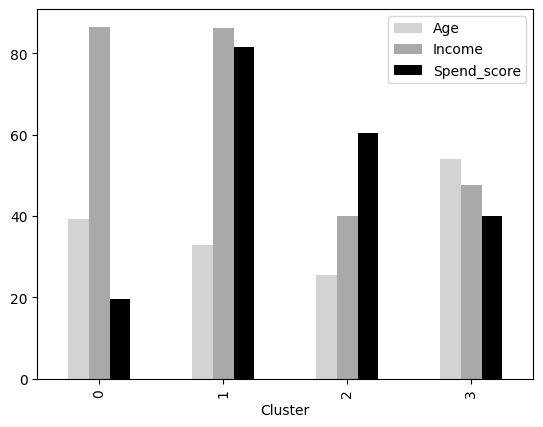

In [28]:
data0.groupby('Cluster')[['Age', 'Income', \
                          'Spend_score']].mean() \
     .plot.bar(color=['lightgray', 'darkgray', 'black'])
plt.show()

Note that the x and y axes here are the PCs, and therefore are not easily interpretable.
However, by visualizing the clusters, we can get a sense of how good the clusters are based on how much they overlap or are seperated
describe the clusters is as follows:

Cluster 0: Middle-aged penny pinchers (high income, low spend)
Cluster 1: Young high rollers (younger age, high income, high spend)
Cluster 2: Young aspirers (low income, high spend)
Cluster 3: Old average Joes (average income, average spend)

Exercise 4.02: Choosing the Number of Clusters Based on Visual Inspection

In [29]:
mall0 = data0.copy()
mall0.rename({'Annual Income (k$)':'Income', \
              'Spending Score (1-100)':'Spend_score'}, \
             axis=1, inplace=True)
mall0.head()

,CustomerID,Gender,Age,Income,Spend_score,Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [30]:
mall_scaled = mall0.copy()
cols_to_scale = ['Age', 'Income', 'Spend_score']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

mall_scaled[cols_to_scale] = scaler.fit_transform\
                             (mall_scaled[cols_to_scale])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

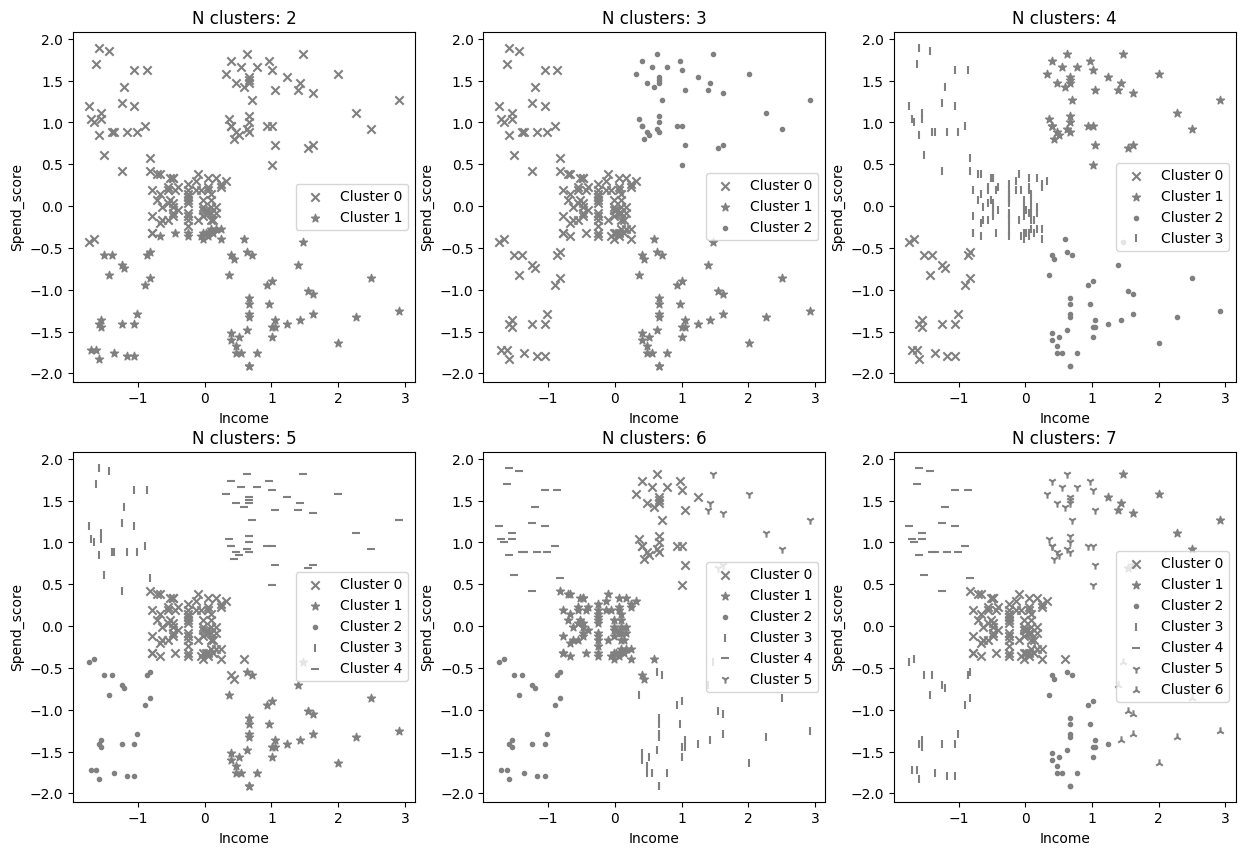

In [31]:
from sklearn.cluster import KMeans

cluster_cols = ['Income', 'Spend_score']

markers = ['x', '*', '.', '|', '_', '1', '2']

plt.figure(figsize=[15,10])
for n in range(2,8):
    model = KMeans(n_clusters=n, random_state=42)
    mall_scaled['Cluster']= model.fit_predict\
                            (mall_scaled[cluster_cols])

    plt.subplot(2,3, n-1) #subplot(row, column, index)
    for clust in range(n):
        temp = mall_scaled[mall_scaled.Cluster == clust]
        plt.scatter(temp.Income, temp.Spend_score, \
                    marker=markers[clust], \
                    label="Cluster "+str(clust), \
                    color='gray')
        plt.title("N clusters: "+str(n))
        plt.xlabel('Income')
        plt.ylabel('Spend_score')
        plt.legend()

plt.show()

In [32]:
K = 3

model = KMeans(n_clusters=K, random_state=42)
model.fit(mall_scaled[cluster_cols])

print(model.inertia_)

157.7040081503594


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
X = mall_scaled[cluster_cols]

inertia_scores = []
for K in range(2,11):
    inertia = KMeans(n_clusters=K, random_state=42).fit(X)\
                                                   .inertia_
    inertia_scores.append(inertia)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

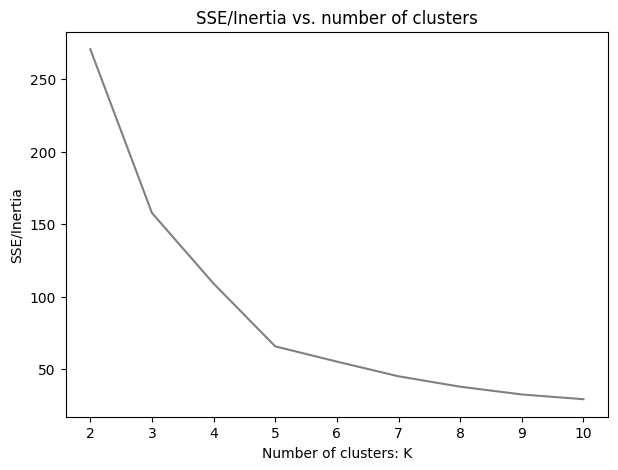

In [34]:
plt.figure(figsize=[7,5])
plt.plot(range(2,11), inertia_scores, color='gray')
plt.title("SSE/Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('SSE/Inertia')
plt.show()

Choose the number of clusters of 5

Exercise 4.06: Using Silhouette Score to Pick Optimal Number of Clusters

In [35]:
cluster_cols = ['Income', 'Spend_score']
X = mall_scaled[cluster_cols]

model = KMeans(n_clusters=3, random_state=42)
cluster_assignments = model.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, cluster_assignments)
print(silhouette_avg)

0.46658474419000145


In [37]:
silhouette_scores = []

for K in range(2, 11):
    model = KMeans(n_clusters=K, random_state=42)
    cluster_assignments = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_assignments)
    silhouette_scores.append(silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

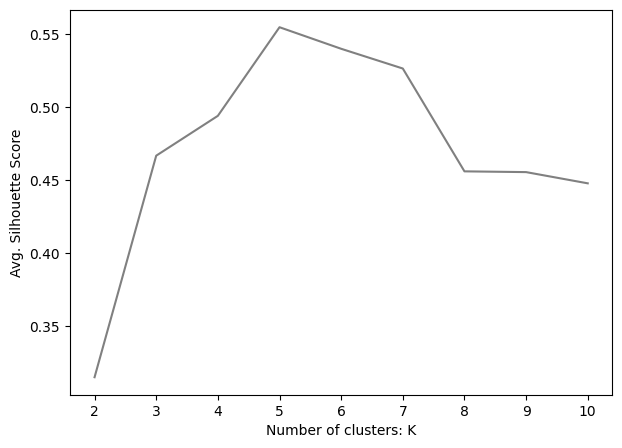

In [38]:
plt.figure(figsize=[7,5])
plt.plot(range(2,11), silhouette_scores, color='gray')
plt.xlabel("Number of clusters: K")
plt.ylabel('Avg. Silhouette Score')
plt.show()

Exercise 4.07: Using a Train-Test Split to Evaluate Clustering Performance

In [39]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split\
                    (mall0, train_size=0.75, \
                     random_state=42)

print(df_train.shape)
print(df_test.shape)

(150, 6)
(50, 6)


In [40]:
model = KMeans(n_clusters=6, random_state=42)
df_train['Cluster'] = model.fit_predict(df_train[cluster_cols])
silhouette_avg = silhouette_score\
                 (df_train[cluster_cols], df_train['Cluster'])
print(silhouette_avg)

0.5436475209961419


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
df_test['Cluster'] = model.predict(df_test[cluster_cols])
silhouette_avg = silhouette_score\
                 (df_test[cluster_cols],df_test['Cluster'])
print(silhouette_avg)

0.49569011684195546


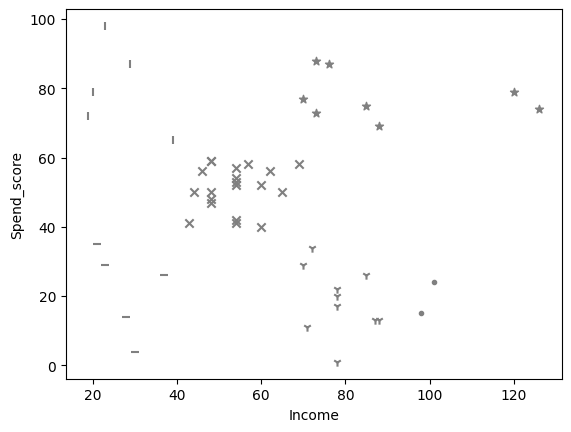

In [42]:
for clust in range(df_test.Cluster.nunique()):
    temp = df_test[df_test.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, \
                marker=markers[clust], \
                color='gray')
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.show()